<a href="https://colab.research.google.com/github/shubhamksingh1/WordTagging/blob/main/KTRAIN/V1/Word_Tagging_Ktrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Notebook environment preparation

In [ ]:
### Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.1.0'

In [ ]:
pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.1.0'

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os

In [ ]:
os.environ['DISABLE_V2_BEHAVIOR'] = '1'

In [ ]:
import pandas as pd

In [ ]:
pip install ktrain

     |████████████████████████████████| 102kB 5.3MB/s 
     |████████████████████████████████| 6.7MB 11.3MB/s 
     |████████████████████████████████| 1.0MB 57.5MB/s 
     |████████████████████████████████| 245kB 66.3MB/s 
     |████████████████████████████████| 1.8MB 57.7MB/s 
     |████████████████████████████████| 481kB 56.5MB/s 
     |████████████████████████████████| 870kB 66.9MB/s 
     |████████████████████████████████| 3.1MB 59.0MB/s 
     |████████████████████████████████| 1.0MB 48.5MB/s 
  Created wheel for ktrain: filename=ktrain-0.9.3-cp36-none-any.whl size=124243 sha256=414a64624b1a725c3195171df58dab46c880fb8bb7700c73377afc66b31f2b64
  Stored in directory: /root/.cache/pip/wheels/a8/f6/39/d4ad01318e7b4b2f491eb199c1c69c801c9db4ad5bce91b76a
  Created wheel for keras-bert: filename=keras_bert-0.81.0-cp36-none-any.whl size=37913 sha256=436f6097a13262aab163b02d2666590007591d154c8856fee3baf292abf8c4fd
  Stored in directory: /root/.cache/pip/wheels/bd/27/da/ffc2d573aa48b87440ec4f

In [ ]:
import ktrain
from ktrain import text

Using DISABLE_V2_BEHAVIOR with TensorFlow
using Keras version: 2.2.4-tf


### Sequence Tagging 

#### Step 1 : Load and Preprocess Data

In [ ]:
df =  pd.read_csv("/content/drive/My Drive/final_new_dataset.csv", encoding = "ISO-8859-1", error_bad_lines=False)

In [ ]:
df.head()

,Words,Tags,SentenceID
0,Pankaj,B-PER,1
1,Seth,I-PER,1
2,-361006,O,1
3,SunShine,O,1
4,2,O,1


In [ ]:
df.shape

(12682, 3)

In [ ]:
df.columns

Index(['Words', 'Tags', 'SentenceID'], dtype='object')

In [ ]:
df.describe(include="all")

,Words,Tags,SentenceID
count,12682,12682,12682.000000
unique,2720,13,NaN
top,in,O,NaN
freq,367,11583,NaN
mean,NaN,NaN,291.528387
std,NaN,NaN,184.335538
min,NaN,NaN,1.000000
25%,NaN,NaN,104.000000
50%,NaN,NaN,296.000000
75%,NaN,NaN,446.000000


In [ ]:
print('\nFrequency distribution of unique values => \n\n'+ str(df['Tags'].value_counts(dropna=False).sort_values(ascending = False)))


Frequency distribution of unique values => 

O         11583
S-TECH      388
I-ORG       147
S-ORG       123
S-TOOL      111
B-ORG        65
I-TECH       57
B-TECH       56
I-TOOL       43
B-TOOL       37
I-PER        36
B-PER        33
S-PER         3
Name: Tags, dtype: int64


In [ ]:
dframe = pd.read_csv("/content/drive/My Drive/ner_dataset.csv", encoding = "ISO-8859-1", error_bad_lines=False)

In [ ]:
dframe.columns

Index(['Sentence #', 'Word', 'POS', 'Tag'], dtype='object')

In [ ]:
print('\nFrequency distribution of unique values => \n\n'+ str(dframe['Tag'].value_counts(dropna=False).sort_values(ascending = False)))


Frequency distribution of unique values => 

O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: Tag, dtype: int64


In [ ]:
df.head()

,Words,Tags,SentenceID
0,Pankaj,B-PER,1
1,Seth,I-PER,1
2,-361006,O,1
3,SunShine,O,1
4,2,O,1


In [ ]:
df.tail()

,Words,Tags,SentenceID
12677,Language,O,614
12678,Proficiency:,O,614
12679,"English,",O,614
12680,"Hindi,",O,614
12681,Punjabi,O,614


In [ ]:
df.Tags.unique()

array(['B-PER', 'I-PER', 'O', 'B-ORG', 'I-ORG', 'S-ORG', 'B-TOOL',
       'I-TOOL', 'S-TOOL', 'S-TECH', 'B-TECH', 'I-TECH', 'S-PER'],
      dtype=object)

In [ ]:
DATAFILE = '/content/drive/My Drive/final_new_dataset.csv'
(trn, val, preproc) = text.entities_from_txt(DATAFILE,
                                             embeddings=None,
                                             sentence_column='SentenceID',
                                             word_column='Words',
                                             tag_column='Tags', 
                                             data_format='gmb')

Number of sentences:  613
Number of words in the dataset:  2720
Tags: ['B-PER', 'S-PER', 'S-TOOL', 'I-TECH', 'I-PER', 'B-ORG', 'S-ORG', 'S-TECH', 'B-TOOL', 'I-TOOL', 'I-ORG', 'O', 'B-TECH']
Number of Labels:  13
Longest sentence: 221 words


#### Step 2: Define a Model

The print_sequence_taggers function shows that, as of this writing, ktrain currently supports a Bidirectional LSTM-CRM model for sequence tagging.

In [ ]:
text.print_sequence_taggers()

bilstm-crf: Bidirectional LSTM-CRF  (https://arxiv.org/abs/1603.01360)


In [ ]:
model = text.sequence_tagger('bilstm-crf', preproc)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: LIVE_VARS_IN


In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val)

In [ ]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/5


/usr/local/lib/python3.6/dist-packages/ktrain/core.py:449: UserWarning: max_epochs is being set to 5 since steps per epoch is small. If you wish to estimate LR using more epochs, set max_epochs manually.
  'If you wish to estimate LR using more epochs, set max_epochs manually.')


17/17 [==============================] - 14s 813ms/step - loss: 22.6076
Epoch 2/5
17/17 [==============================] - 8s 464ms/step - loss: 22.5704
Epoch 3/5
17/17 [==============================] - 8s 474ms/step - loss: 21.7151
Epoch 4/5
17/17 [==============================] - 7s 439ms/step - loss: 19.5614
Epoch 5/5
17/17 [==============================] - 9s 551ms/step - loss: 32.2549


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


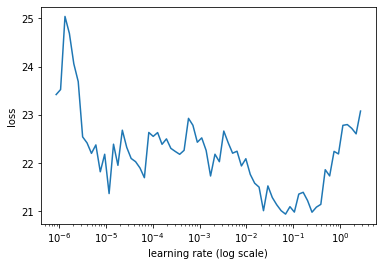

In [ ]:
learner.lr_plot()

#### STEP 3: Train and Evaluate the Model

In [ ]:
learner.fit(0.1, 100)

Epoch 1/100
18/18 [==============================] - 9s 528ms/step - loss: 20.6777 - val_loss: 32.1280
Epoch 2/100
18/18 [==============================] - 9s 507ms/step - loss: 20.9512 - val_loss: 31.6477
Epoch 3/100
18/18 [==============================] - 9s 494ms/step - loss: 20.2366 - val_loss: 31.1929
Epoch 4/100
18/18 [==============================] - 9s 480ms/step - loss: 20.0030 - val_loss: 31.0428
Epoch 5/100
18/18 [==============================] - 9s 486ms/step - loss: 19.9528 - val_loss: 31.0026
Epoch 6/100
18/18 [==============================] - 9s 488ms/step - loss: 19.9518 - val_loss: 31.0085
Epoch 7/100
18/18 [==============================] - 9s 480ms/step - loss: 19.9329 - val_loss: 30.9912
Epoch 8/100
18/18 [==============================] - 9s 492ms/step - loss: 19.9278 - val_loss: 30.9842
Epoch 9/100
18/18 [==============================] - 9s 490ms/step - loss: 19.9397 - val_loss: 30.9543
Epoch 10/100
18/18 [==============================] - 9s 488ms/step - los

In [ ]:
learner.validate(class_names=preproc.get_classes())

   F1: 77.89
           precision    recall  f1-score   support

      ORG       0.87      0.93      0.90        14
     TECH       0.79      0.77      0.78        62
     TOOL       0.68      0.81      0.74        16
      PER       0.00      0.00      0.00         3

micro avg       0.78      0.78      0.78        95
macro avg       0.76      0.78      0.77        95



0.7789473684210526

Our F1-score is 83.87 after 100 epochs of training

Let's invoke view_top_losses to see the sentence we got the most wrong. This single sentence about VISHAL MALVIY contains 1 word that is misclassified.

In [ ]:
learner.view_top_losses(n=1)

total incorrect: 10
Word            True : (Pred)
)              :O     (O)
Languages      :O     (O)
Core           :O     (B-TECH)
java,          :O     (I-TECH)
Yang           :O     (O)
UI             :O     (O)
Special        :O     (O)
Tools          :O     (O)
Eclipse        :S-TOOL (S-TOOL)
Database       :O     (B-TOOL)
Oracle         :S-TECH (I-TOOL)
O/s/Software/Server:O     (O)
Window,        :O     (O)
SVN            :S-TOOL (O)
karaf,Docker   :O     (O)
Project        :O     (O)
Name           :O     (O)
ETMF           :O     (O)
Bulk           :O     (O)
Loader         :O     (O)
Client         :O     (O)
GSK            :O     (O)
Role           :O     (O)
Developer,     :O     (O)
Support,       :O     (O)
Testing        :O     (O)
and            :O     (O)
maintenance    :O     (O)
Team           :O     (O)
Size           :O     (O)
6              :O     (O)
Summary        :O     (O)
ETMF           :O     (O)
Bulk           :O     (O)
uploader       :O     (O)
is      

#### Making Predictions on New Sentences

Let's use our model to extract entities from new sentences. We begin by instantating a Predictor object.

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
predictor.predict('Tilak has 2 years of experience in Python and Java')

[('Tilak', 'O'),
 ('has', 'O'),
 ('2', 'O'),
 ('years', 'O'),
 ('of', 'O'),
 ('experience', 'O'),
 ('in', 'O'),
 ('Python', 'S-TECH'),
 ('and', 'O'),
 ('Java', 'S-TECH')]

In [ ]:
predictor.predict("Angular")

[('Angular', 'O')]

In [ ]:
predictor.predict("Python")

[('Python', 'S-TECH')]

In [ ]:
predictor.predict("Google Cloud Platform")

[('Google', 'B-TOOL'), ('Cloud', 'I-TOOL'), ('Platform', 'I-TOOL')]

In [ ]:
predictor.predict("Cloud")

[('Cloud', 'O')]

In [ ]:
predictor.predict("Google Cloud Platform")

[('Google', 'B-TOOL'), ('Cloud', 'I-TOOL'), ('Platform', 'I-TOOL')]

#### We can save the predictor for later deployment.

In [ ]:
predictor.save('/content/drive/My Drive/Seq_Tag_ktrain/mypred')

In [ ]:
reloaded_predictor = ktrain.load_predictor('/content/drive/My Drive/Seq_Tag_ktrain/mypred')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: LIVE_VARS_IN


In [ ]:
reloaded_predictor.predict('Python')

[('Python', 'S-TECH')]